In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Generate a sinusoid sweep

We generate a sine waveform with a frequency sweep from 200 to 4000 Hz. Is this correct?

In [36]:
fs = 8000
dur = 2
freq = np.linspace(220,4000,dur*fs);

x1 = np.sin(2*np.pi*freq*np.arange(dur*fs)/fs);


ipd.Audio(x1, rate=fs)


Why the frequency come back? Let's plot the spectrogram. Why do we have the problem? Aliasing or other reasons?

Text(0.5, 1.0, 'Linear-frequency spectrogram')

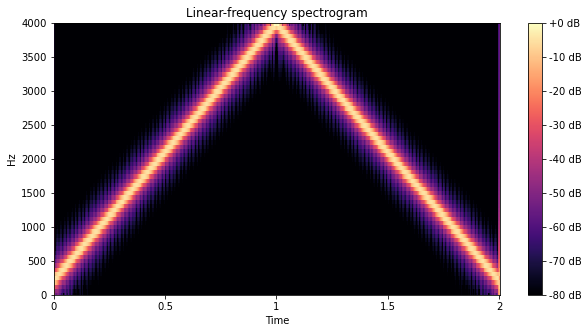

In [44]:
hop_length = 32
n_fft = 128

X1 = librosa.stft(x1, window='hann', n_fft=n_fft, hop_length=hop_length)
D1 = librosa.amplitude_to_db(np.abs(X1), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




Let's use phase which is the summation of instantaenous frequency

In [41]:
fs = 8000
dur = 2
freq = np.linspace(220,4000,dur*fs);


phase = 0;
x2 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x2[i] = np.sin(phase)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

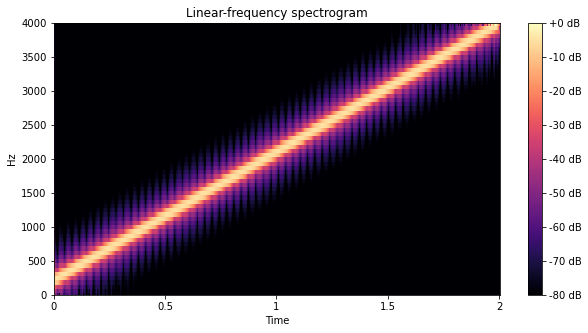

In [43]:
hop_length = 32
n_fft = 128

X2 = librosa.stft(x2, window='hann', n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(X2), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




Hooray! 

Note that the frequency is a function of time in the sine sweep. Therefore, the phase should be computed as an integral (or summation) of the time-dependent frequency. That is, $phase = \int freq(t) dt$ = $\int a t dt= a\frac{t^2}{2}$).

# Geneate a sine sweep with aliasing 

In [45]:
fs = 8000
dur = 2
freq = np.linspace(220,16000,dur*fs);


phase = 0;
x3 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x3[i] = np.sin(phase)

    
ipd.Audio(x, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

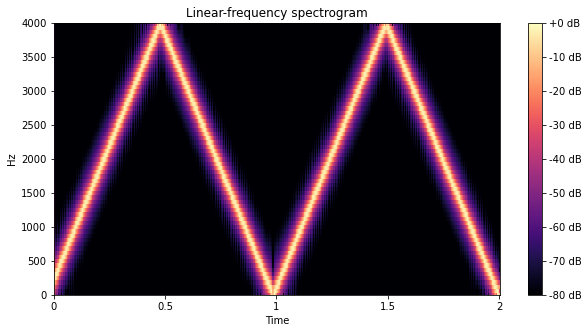

In [46]:
hop_length = 32
n_fft = 128

X3 = librosa.stft(x3, window='hann', n_fft=n_fft, hop_length=hop_length)
D3 = librosa.amplitude_to_db(np.abs(X3), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D3, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Geneate a harmonic sine sweep with aliasing 

In [64]:
fs = 8000
dur = 2
freq = np.linspace(220,16000,dur*fs);


phase = 0;
x4 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x4[i] = np.sin(phase)+ np.sin(2*phase)+ np.sin(3*phase)

    
ipd.Audio(x4, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

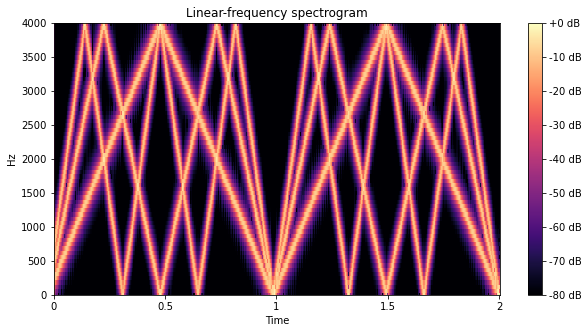

In [65]:
hop_length = 32
n_fft = 128

X4 = librosa.stft(x4, window='hann', n_fft=n_fft, hop_length=hop_length)
D4 = librosa.amplitude_to_db(np.abs(X4), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D4, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Geneate a sine with a random frequency 

In [66]:
fs = 8000
dur = 2
freq = np.arange(440,2000,10)
freq_change_rate = 0.1*fs

phase = 0;
x5 = np.zeros(dur*fs)

for i in range(dur*fs):
    if np.remainder(i,freq_change_rate) == 0:
        r = np.random.rand(1)
        f = freq[int(r*len(freq))]
        
    phase = phase + 2*np.pi*f/fs;
    x5[i] = np.sin(phase)
    
ipd.Audio(x5, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

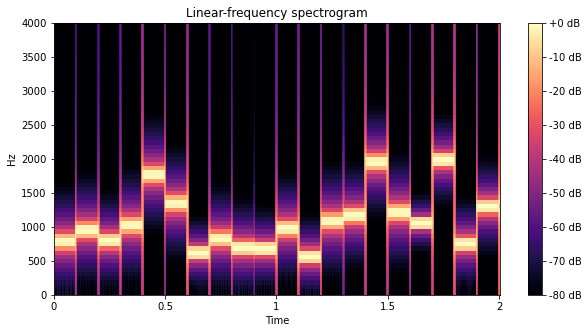

In [68]:
hop_length = 32
n_fft = 128

X5 = librosa.stft(x5, window='hann', n_fft=n_fft, hop_length=hop_length)
D5 = librosa.amplitude_to_db(np.abs(X5), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D5, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




R2D2? 

# Geneate a sine with clipping

In [80]:
fs = 8000
dur = 2
freq = 220

phase = 0;
x6 = np.zeros(dur*fs)

clip_max = 0.5

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq/fs;
    x6[i] = np.sin(phase)
    
    if x6[i] > clip_max:
        x6[i] = clip_max
    elif x6[i] < -clip_max:    
        x6[i] = -clip_max
    
ipd.Audio(x6, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

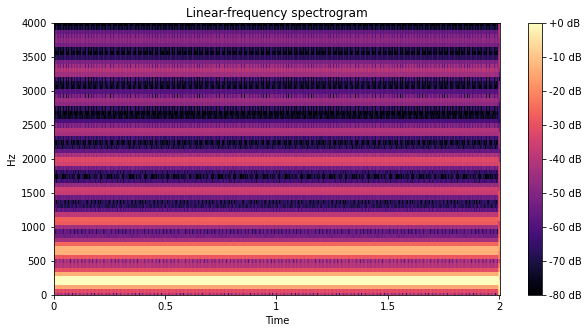

In [81]:
hop_length = 32
n_fft = 128

X6 = librosa.stft(x6, window='hann', n_fft=n_fft, hop_length=hop_length)
D6 = librosa.amplitude_to_db(np.abs(X6), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D6, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




This is a digital artifact but also a method of non-linear sound synthesis :)

# Generate a sine sweep with clipping 

In [83]:
fs = 8000
dur = 2
freq = np.linspace(220,4000,dur*fs);

clip_max = 0.5

phase = 0;
x7 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x7[i] = np.sin(phase)

    if x7[i] > clip_max:
        x7[i] = clip_max
    elif x7[i] < -clip_max:    
        x7[i] = -clip_max

ipd.Audio(x7, rate=fs)
    

Text(0.5, 1.0, 'Linear-frequency spectrogram')

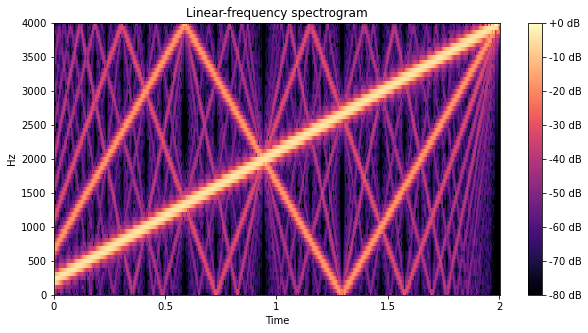

In [86]:
hop_length = 32
n_fft = 128

X7 = librosa.stft(x7, window='hann', n_fft=n_fft, hop_length=hop_length)
D7 = librosa.amplitude_to_db(np.abs(X7), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D7, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Generate a sine sweep with random frequency and clipping 

In [87]:
fs = 8000
dur = 2
freq = np.arange(440,2000,10)
freq_change_rate = 0.1*fs

phase = 0;
x8 = np.zeros(dur*fs)

for i in range(dur*fs):
    if np.remainder(i,freq_change_rate) == 0:
        r = np.random.rand(1)
        f = freq[int(r*len(freq))]
        
    phase = phase + 2*np.pi*f/fs;
    x8[i] = np.sin(phase)

    if x8[i] > clip_max:
        x8[i] = clip_max
    elif x8[i] < -clip_max:    
        x8[i] = -clip_max    
    
ipd.Audio(x8, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

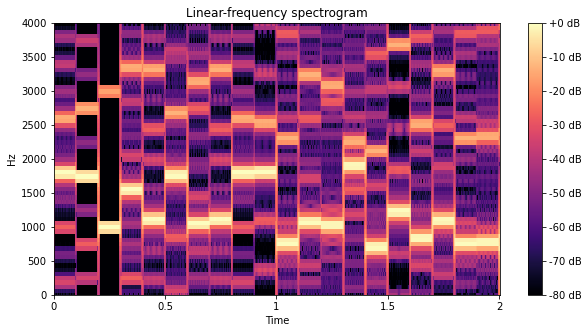

In [89]:
hop_length = 32
n_fft = 128

X8 = librosa.stft(x8, window='hann', n_fft=n_fft, hop_length=hop_length)
D8 = librosa.amplitude_to_db(np.abs(X8), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D8, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Quantization


In [111]:

fs = 8000
dur = 2
freq = 440
B = 4 # number of bits

phase = 0;
x9 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq/fs;
    x9[i] = np.sin(phase)
    
    # quantization
    x9[i] = np.power(2,B-1)*x9[i]
    x9[i] = np.round(x9[i])
    x9[i] = x9[i]/np.power(2,B-1)   
    
    
ipd.Audio(x9, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

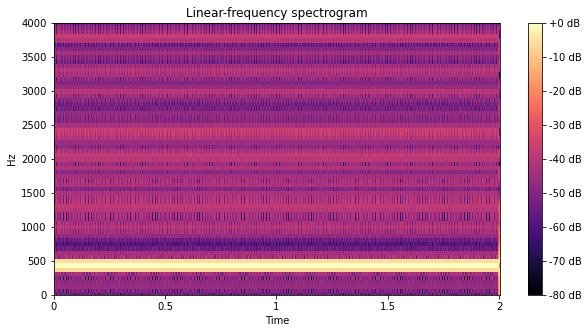

In [105]:
hop_length = 32
n_fft = 128

X9 = librosa.stft(x9, window='hann', n_fft=n_fft, hop_length=hop_length)
D9 = librosa.amplitude_to_db(np.abs(X9), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D9, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Quantization + Dithering

In [113]:

fs = 8000
dur = 2
freq = 440
B = 4 # number of bits

phase = 0;
x10 = np.zeros(dur*fs)

np.random.seed(1);

white_noise = (np.random.rand(dur*fs)-0.5)/2

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq/fs;
    x10[i] = np.sin(phase)
    
    # quantization
    x10[i] = np.power(2,B-1)*x10[i]
    
    x10[i] = x10[i] + white_noise[i]
    
    x10[i] = np.round(x10[i])
    x10[i] = x10[i]/np.power(2,B-1)   
    
    
ipd.Audio(x10, rate=fs)



Text(0.5, 1.0, 'Linear-frequency spectrogram')

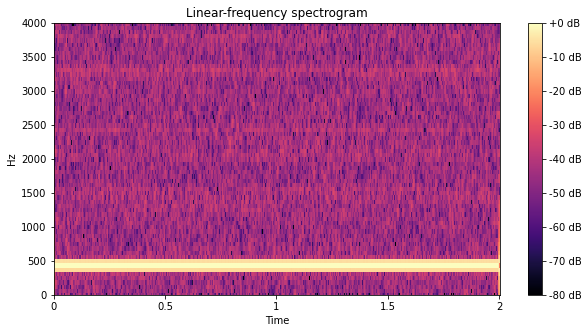

In [114]:
hop_length = 32
n_fft = 128

X10 = librosa.stft(x10, window='hann', n_fft=n_fft, hop_length=hop_length)
D10 = librosa.amplitude_to_db(np.abs(X10), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D10, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')


